In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('database_votes.csv')

In [2]:
df=df.dropna()

In [3]:
Scrutins = df['titre'].unique()
print("Il y a ", len(Scrutins) , "scrutins différents")

Nombre_votants_par_scrutin = df.groupby("titre")['votants'].count().reset_index().sort_values(by='votants',ascending = False)

Il y a  3109 scrutins différents


In [4]:
Votants = df['idVotant'].unique()
print("Il y a ", len(Votants) , "votants différents")

Il y a  638 votants différents


In [5]:
Nombre_votants_par_scrutin = df.groupby("titre")['votants'].count().reset_index().sort_values(by='votants',ascending = False)

In [6]:
Avis_votant = pd.DataFrame(df.groupby(['idVotant']).vote.value_counts())
Avis_votant=Avis_votant.rename(columns={'vote':'nombre'})
Total_votant = df.groupby(['idVotant']).vote.count()

In [7]:
#Création d'un tableau répetoriant pour chaque votant sa proportion de Pour/Contre

Avis_votant = pd.DataFrame(df.groupby(['idVotant']).vote.value_counts())
Avis_votant=Avis_votant.rename(columns={'vote':'nombre'})
Total_votant = df.groupby(['idVotant']).vote.count()
Proportion_vote = pd.DataFrame({'Proportion' : Avis_votant['nombre'].div(Total_votant)*100})
Proportion_vote

Proportion
idVotant vote              
PA1008   Pour     68.944099
         Contre   31.055901
PA1012   Pour     65.765766
         Contre   34.234234
PA1029   Contre   51.818182
...                     ...
PA923    Contre   41.991342
PA942    Contre   50.111359
         Pour     49.888641
PA998    Contre   55.000000
         Pour     45.000000

[1290 rows x 1 columns]

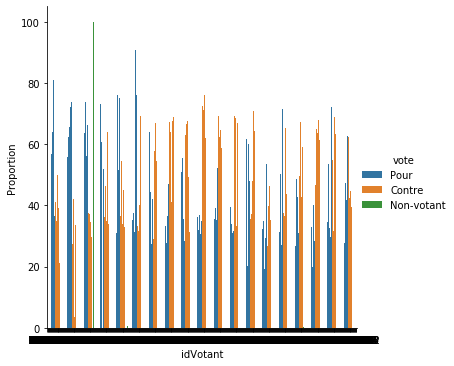

In [8]:
Proportion_vote = Proportion_vote.reset_index()
sns.catplot(hue='vote', x="idVotant", y="Proportion", data=Proportion_vote, kind="bar")

In [9]:
times = pd.DatetimeIndex(df.date_scrutin)
df2 = df.set_index(keys = times)

In [8]:
#df3 = pd.DataFrame(df2.groupby(by=[pd.Grouper(freq='1A', base = 0, label = 'left'),'idVotant','vote','titre']))

In [10]:
Demandeurs = df.groupby("demandeur")['resultat'].count().reset_index().sort_values(by='resultat',ascending = False)
Demandeurs

,demandeur,resultat
73,"Président du groupe ""Les Républicains""",60422
27,"Président du groupe ""La France insoumise""",50986
119,"Président du groupe ""de la Gauche démocrate et...",35943
155,"Présidente du groupe ""Socialistes et apparentés""",27773
4,Conférence des Présidents,24929
...,...,...
144,"Président( du groupe ""La France insoumise""",36
120,"Président du groupe ""de la Gauche démocrate et...",35
111,"Président du groupe ""UDI, Agir et Indépendants...",34
54,"Président du groupe ""La République en Marche""\...",33


In [103]:
#Proportion et nombre de propositions adoptées/rejetées par demandeur 
Resultats_demandeur = pd.DataFrame(df.groupby(['demandeur']).resultat.value_counts())
Resultats_demandeur=Resultats_demandeur.rename(columns={'resultat':'nombre'})

demandeurs = df.groupby(['demandeur']).resultat.count()
Proportion_dem = pd.DataFrame({'Proportion' : Resultats_demandeur['nombre'].div(demandeurs)*100})

Proportion_resultats_dem=pd.concat([Resultats_demandeur,Proportion_dem['Proportion']],axis=1)
Proportion_resultats_dem

,,nombre,Proportion
demandeur,resultat,,
"""\rPresident(e) du groupe ""de la Gauche démocrate et républicaine""",rejeté,132,100.000000
Commission,adopté,78,100.000000
Commission spéciale,adopté,94,100.000000
Conference des Presidents,adopté,446,100.000000
Conférence des Présidents,adopté,23372,93.754262
...,...,...,...
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""UDI, Agir et Indépendants""",rejeté,131,100.000000
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""UDI, Agir et Indépendants""Président du groupe ""Libertés et Territoires""",adopté,123,100.000000
"Présidente du groupe ""Socialistes et apparentés""Président du groupe ""de la Gauche démocrate et républicaine""",rejeté,436,55.329949


In [111]:
#Création d'un indice qui donne le pourcentage de comptabilité entre le vote du votant (Pour/Contre) et la décision finale (Accord/Rejet)
df3= df[((df.vote == 'Pour') & (df.resultat == 'adopté')) | ((df.vote == 'Contre') & (df.resultat == 'rejeté'))]

Accord_votant = df3.idVotant.value_counts() 
Total_votant = df.idVotant.value_counts()

IndiceAccord=[]
Votants2=df3['idVotant'].unique()
for votant in Votants2:     
    IndiceAccord.append(int(Accord_votant[votant])/int(Votes_votant[votant])*100)



In [112]:
IndiceAccordDF = pd.DataFrame({'idVotant' : Votants2,
                               'IndiceAccord' : IndiceAccord})
IndiceAccordDF

,idVotant,IndiceAccord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.096033
3,PA718802,74.656189
4,PA719032,74.832962
...,...,...
630,PA643004,27.272727
631,PA610634,42.857143
632,PA719002,14.285714
633,PA774958,14.893617
